<a href="https://colab.research.google.com/github/13apoorva/ML_DL_MINI_PROJECTS/blob/main/Sentiment_Analysis_customer_review/Watch_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING REQUIRED LIBRARIES**

In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
from time import sleep
import re
import csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**SCRAPPED REVIEWER AND RATING DATA FROM FLIPKART USING THIS CODE AND CREATED A CSV FILE**

In [ ]:

#review=[]
#rating=[]
#for i in range(1,72):
  #url="https://www.flipkart.com/fastrack-38024pp25-minimalists-analog-watch-men/product-reviews/itmf3zhmxfzubhhq?pid=WATF2VTY73GHJ4PY&lid=LSTWATF2VTY73GHJ4PYCHX8J2&marketplace=FLIPKART&page="+str(i)
  #response = requests.get(url)
  #htmlcontent = response.content
  #response = requests.get(url)
  #htmlcontent = response.content
  #soup = BeautifulSoup(htmlcontent,"html.parser")
  #rev=soup.find_all('div',attrs={'class':'_6K-7Co'})
  #rat=soup.find_all('div',attrs={'class':'_3LWZlK _1BLPMq _3B8WaH'})
  #print(len(rev))
  #for i in rev:
    #review.append(i.text)
  #for i in rat:
    #rating.append(i.text)


**CREATED DATAFRAME AND CONVERTED INTO A CSV FILE**

In [ ]:
#data={"Review": review,"Rating": rating}
#df = pd.DataFrame.from_dict(data, orient='index')
#df = df.transpose()

In [ ]:
#df.to_csv('NLP.csv')

In [ ]:
df=pd.read_csv("/content/NLP.csv")

In [ ]:
df.head()

,Review,Rating
0,My best brand Fasttrack I like it is nice watc...,5.0
1,This is very good midrange watch from Fastrack...,5.0
2,Very very good product I liked it so much look...,4.0
3,I really like big dials eventhough my parents ...,5.0
4,Genuine product from fast track at affordable ...,5.0


In [ ]:
df.shape

(710, 2)

In [ ]:
df.isnull().sum()

Review     0
Rating    39
dtype: int64

In [ ]:
df['Rating']

0      5.0
1      5.0
2      4.0
3      5.0
4      5.0
      ... 
705    NaN
706    NaN
707    NaN
708    NaN
709    NaN
Name: Rating, Length: 710, dtype: float64

In [ ]:
df.isnull().sum()

Review     0
Rating    39
dtype: int64

In [ ]:
df["Rating"].value_counts()

5.0    507
4.0    131
3.0     33
Name: Rating, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 710 entries, 0 to 709
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Review  710 non-null    object 
 1   Rating  671 non-null    float64
dtypes: float64(1), object(1)
memory usage: 11.2+ KB


In [ ]:
mode_Rating = df["Rating"].mode()
mode_Rating

0    5.0
dtype: float64

In [ ]:
Rating_temp=df.copy()
Rating_temp["Rating"] = Rating_temp["Rating"].fillna(mode_Rating)
Rating_temp.isnull().sum()

Review     0
Rating    39
dtype: int64

In [ ]:
Rating_temp.isnull().sum()

Review     0
Rating    39
dtype: int64

In [ ]:
Rating_temp.dropna(inplace=True)
Rating_temp.tail()

,Review,Rating
666,Nice product,5.0
667,Cool one ...,5.0
668,Good,4.0
669,Good quality,5.0
670,Awsome,5.0


In [ ]:
Rating_temp.shape

(671, 2)

In [ ]:
Rating_temp.isnull().sum()

Review    0
Rating    0
dtype: int64

In [ ]:
Rating_temp.tail()

,Review,Rating
666,Nice product,5.0
667,Cool one ...,5.0
668,Good,4.0
669,Good quality,5.0
670,Awsome,5.0


In [ ]:
df["Rating"].value_counts()

5.0    507
4.0    131
3.0     33
Name: Rating, dtype: int64

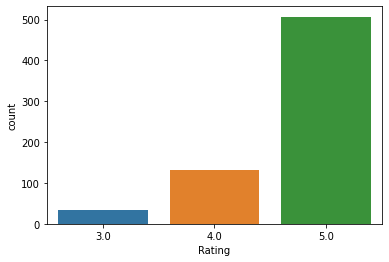

In [ ]:
sns.countplot(x='Rating',data=Rating_temp)

Text(0.5, 1.0, 'Distribution of different Sentiments')

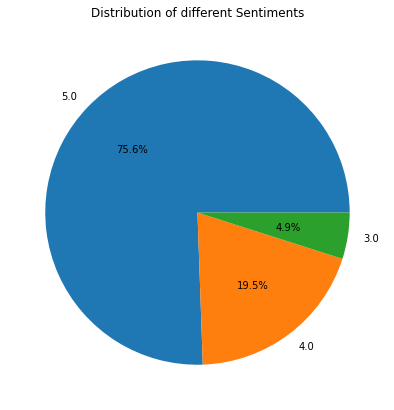

In [ ]:
fig=plt.figure(figsize=(7,7))
tags=Rating_temp['Rating'].value_counts()
tags.plot(kind='pie',autopct='%1.1f%%',label='')
plt.title("Distribution of different Sentiments")

In [ ]:
df_neg = Rating_temp.loc[Rating_temp["Rating"]<=3.0]
df_neg=df_neg.reset_index(drop=True)

In [ ]:
df_neg

,Review,Rating
0,product is good ..but very light . metal body ...,3.0
1,Great watch at this price segment... Soft mate...,3.0
2,Good watch for the people who wants to buy bel...,3.0
3,wrist size is more then 8cm was is good and yo...,3.0
4,"It's a nice watch ,cool looking not too funky ...",3.0
5,I orderes this watch and get delivered in 2 da...,3.0
6,very big sized,3.0
7,Nice watch...my brother likd,3.0
8,Nice watchNot so much costly,3.0
9,Watch is good. but the packing is so bad,3.0


In [ ]:
df_pos = Rating_temp.loc[Rating_temp["Rating"]>=4]
df_pos=df_pos.reset_index(drop=True)

In [ ]:
df_all=pd.concat([df_neg,df_pos],axis=0)
df_all=df_all.reset_index(drop=True)

In [ ]:
df_all.shape

(671, 2)

In [ ]:
df_all.describe()

,Rating
count,671.000000
mean,4.706408
std,0.553365
min,3.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
df_all['Sentiment']=np.where(df_all["Rating"]==str(5),"Positive","Negative")

In [ ]:
df_all.tail()

,Review,Rating,Sentiment
666,Nice product,5.0,Negative
667,Cool one ...,5.0,Negative
668,Good,4.0,Negative
669,Good quality,5.0,Negative
670,Awsome,5.0,Negative


In [ ]:
df_all=df_all.sample(frac=1)
df_all=df_all.reset_index(drop=True)

In [ ]:
df_all.head(10)

,Review,Rating,Sentiment
0,Dulpicte watch,5.0,Negative
1,Perfect in this range👍,5.0,Negative
2,"Guys do read this review, hope it might help b...",5.0,Negative
3,nice watch for boys for personality maintenance,5.0,Negative
4,Very big dial,4.0,Negative
5,Value for money,5.0,Negative
6,excellent watch big dial watch is beyond our e...,5.0,Negative
7,"really looking nice,,,,",5.0,Negative
8,awesome watch by flipkart super fast service. ...,5.0,Negative
9,perfect,4.0,Negative


In [ ]:
import nltk

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
all_stopwords=stopwords.words("english")
all_stopwords.remove('not')

In [ ]:
corpus=[]
for i in range(0,671):
  review=re.sub('[^a-zA-Z]',' ',df_all['Review'][i])
  review=review.lower()
  review=review.split()
  review=[ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  review=' '.join(review)
  corpus.append(review)

In [ ]:
corpus

['dulpict watch',
 'perfect rang',
 'guy read review hope might help buy product product come good packag insid box get watch user manual watch resist upto e watch water resist suitabl contact splash rain swim dive watch batteri come guarante valid year date purchas watch come guarante month date purchas conditio',
 'nice watch boy person mainten',
 'big dial',
 'valu money',
 'excel watch big dial watch beyond expect realli good watch price goe fastrack showroom get one watch stock seen flipkart book immedi valu money superb quantiti genuin origin',
 'realli look nice',
 'awesom watch flipkart super fast servic thank flipkart',
 'perfect',
 'look cool size head littl bit larg otherwis super cool casual watch price rang',
 'super qualitynic look',
 'super gud look fast deliveri',
 'good qualiti comfort wear perfect watch classi peopl glass need protect',
 'belt vri nice n got orgin product',
 'look dull',
 'super design pic super fast deliveri thnq much happi custom',
 'nice',
 'feel l

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=1500)
x=cv.fit_transform(corpus).toarray()
y=df_all['Rating'].values


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=48)

**USED DIFFERENT MODELS FOR BEST ACCURACY, HOWEVER BEST ACCURACY WAS OBTAINED IN CASE OF SVM MODEL **

#SVC=79.25%
#GaussianNB=36.29%
#MultinomialNB=76.2%
#KNeighbors=76.29%
#LogisticRegression=74.81%


In [ ]:
from sklearn.svm import SVC
classifier=SVC()
classifier.fit(x_train,y_train)

SVC()

In [ ]:
y_pred=classifier.predict(x_test)

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))


              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         3
         4.0       0.00      0.00      0.00        25
         5.0       0.79      1.00      0.88       107

    accuracy                           0.79       135
   macro avg       0.26      0.33      0.29       135
weighted avg       0.63      0.79      0.70       135



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[  0   0   3]
 [  0   0  25]
 [  0   0 107]]


In [ ]:
print(metrics.accuracy_score(y_test,y_pred))

0.7925925925925926


In [ ]:
#from sklearn.naive_bayes import GaussianNB
#classifier=GaussianNB()
#classifier.fit(x_train,y_train)

In [ ]:
#from sklearn.naive_bayes import MultinomialNB
#classifier=MultinomialNB()
#classifier.fit(x_train,y_train)

In [ ]:
#from sklearn.neighbors import KNeighborsClassifier()
#classifier=KNeighborsClassifier()
#classifier.fit(x_train,y_train)

In [ ]:
#from sklearn.linear_model import LogisticRegression
#classifier=LogisticRegression()
#classifier.fit(x_train,y_train)

In [ ]:
rev=["Very Nice Place,loved it"]
result=model.predict(rev)
print(result)